29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


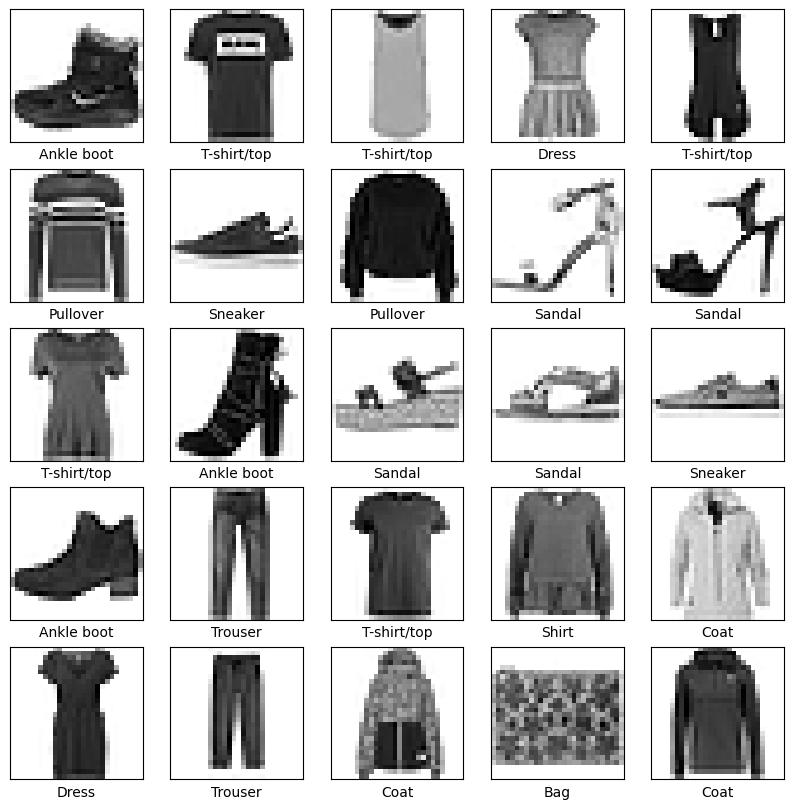

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load and preprocess the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalise the image data to values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Visualise some sample images
def plot_images(images, labels):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

plot_images(train_images, train_labels)


In [ ]:
# Build the neural network model with two hidden layers
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 image to a 1D array
    layers.Dense(128, activation='sigmoid'),  # Hidden layer 1 with Sigmoid activation
    layers.Dense(64, activation='sigmoid'),   # Hidden layer 2 with Sigmoid activation
    layers.Dense(10, activation='softmax')   # Output layer (10 classes, softmax for classification)
])

# Compile the model
model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Train the model with the specified batch size and epochs
history = model.fit(train_images, train_labels, epochs=10, batch_size=1000, validation_data=(test_images, test_labels))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.1006 - loss: 2.3899 - val_accuracy: 0.1187 - val_loss: 2.2950
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1431 - loss: 2.2846 - val_accuracy: 0.2546 - val_loss: 2.2656
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2973 - loss: 2.2615 - val_accuracy: 0.3482 - val_loss: 2.2496
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3539 - loss: 2.2454 - val_accuracy: 0.3818 - val_loss: 2.2343
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3933 - loss: 2.2299 - val_accuracy: 0.4155 - val_loss: 2.2185
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4238 - loss: 2.2143 - val_accuracy: 0.4314 - val_loss: 2.2021
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4368 - loss: 2.1976 - val_accuracy: 0.4531 - val_loss: 2.1848
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4560 - loss: 2.1798 - val_accuracy: 0.4717 - v

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_accuracy}")


313/313 - 1s - 2ms/step - accuracy: 0.4920 - loss: 2.1270
Test accuracy: 0.492000013589859


In [ ]:
# Build the neural network model with two hidden layers and ReLU activation
model_relu = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 image to a 1D array
    layers.Dense(128, activation='relu'),  # Hidden layer 1 with ReLU activation
    layers.Dense(64, activation='relu'),   # Hidden layer 2 with ReLU activation
    layers.Dense(10, activation='softmax')  # Output layer (10 classes, softmax for classification)
])

# Compile and train the model
model_relu.compile(optimizer='sgd',
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                   metrics=['accuracy'])
history_relu = model_relu.fit(train_images, train_labels, epochs=10, batch_size=1000, validation_data=(test_images, test_labels))


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3112 - loss: 2.0732 - val_accuracy: 0.5973 - val_loss: 1.5928
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6312 - loss: 1.4829 - val_accuracy: 0.6537 - val_loss: 1.2516
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6650 - loss: 1.1871 - val_accuracy: 0.6717 - val_loss: 1.0603
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6845 - loss: 1.0160 - val_accuracy: 0.6945 - val_loss: 0.9455
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7097 - loss: 0.9068 - val_accuracy: 0.7101 - val_loss: 0.8713
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7275 - loss: 0.8380 - val_accuracy: 0.7308 - val_loss: 0.8185
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7457 - loss: 0.7859 - val_accuracy: 0.7394 - val_loss: 0.7783
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7541 - loss: 0.7535 - val_accuracy: 0.7491 - v

In [ ]:
# Build the model with Dropout regularisation
model_dropout = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 image to a 1D array
    layers.Dense(128, activation='relu'),  # Hidden layer 1 with ReLU activation
    layers.Dropout(0.2),                   # Dropout layer (20% of neurons will be dropped)
    layers.Dense(64, activation='relu'),   # Hidden layer 2 with ReLU activation
    layers.Dropout(0.2),                   # Dropout layer (20% of neurons will be dropped)
    layers.Dense(10, activation='softmax')  # Output layer (10 classes, softmax for classification)
])

# Compile and train the model
model_dropout.compile(optimizer='sgd',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                      metrics=['accuracy'])
history_dropout = model_dropout.fit(train_images, train_labels, epochs=10, batch_size=1000, validation_data=(test_images, test_labels))


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.1951 - loss: 2.2257 - val_accuracy: 0.5217 - val_loss: 1.7892
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.4243 - loss: 1.7708 - val_accuracy: 0.5916 - val_loss: 1.4280
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5046 - loss: 1.4858 - val_accuracy: 0.6384 - val_loss: 1.1981
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.5566 - loss: 1.2935 - val_accuracy: 0.6655 - val_loss: 1.0585
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5844 - loss: 1.1825 - val_accuracy: 0.6758 - val_loss: 0.9709
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6065 - loss: 1.0986 - val_accuracy: 0.6901 - val_loss: 0.9100
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6269 - loss: 1.0432 - val_accuracy: 0.6979 - val_loss: 0.8655
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6451 - loss: 0.9895 - val_accuracy: 0.7070 - v

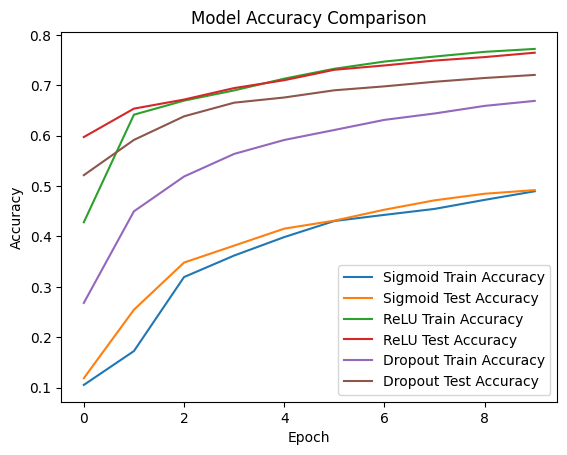

In [ ]:
# Plot the training and validation accuracy for comparison
plt.plot(history.history['accuracy'], label='Sigmoid Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Sigmoid Test Accuracy')
plt.plot(history_relu.history['accuracy'], label='ReLU Train Accuracy')
plt.plot(history_relu.history['val_accuracy'], label='ReLU Test Accuracy')
plt.plot(history_dropout.history['accuracy'], label='Dropout Train Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout Test Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
